<a href="https://colab.research.google.com/github/jason-jos/machine-learning-series/blob/master/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Feature Engineering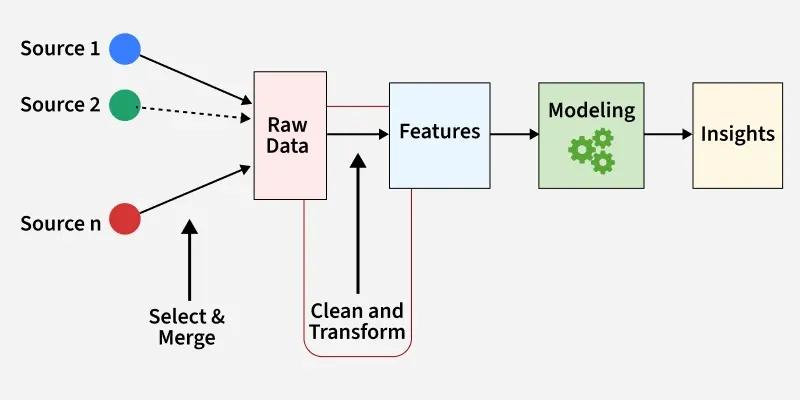

- Feature engineering is the process of turning raw data into useful features that help improve the performance of machine learning models. It includes choosing, creating and adjusting data attributes to make the model’s predictions more accurate. The goal is to make the model better by providing relevant and easy-to-understand information.

### Steps in Feature Engineering
 - Feature Transformation
    - Missing Value Imputation
    - Handling Categorical Features
    - Outlier Detection
    - Feature Scaling
 - Feature Construction
 - Feature Selection
 - Feature Extraction
  

### Feature Scaling
  - Technique of standarizing the independant features in a dataset within a fixed scale

- [***Datasource***](https://www.kaggle.com/datasets/rakeshrau/social-network-ads?select=Social_Network_Ads.csv)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
data=pd.read_csv("./Social_Network_Ads.csv")


In [4]:
df=data.copy()


In [5]:
df=df[['Age','EstimatedSalary','Purchased']]
df.sample(5)

,Age,EstimatedSalary,Purchased
298,45,79000,0
210,48,96000,1
130,31,58000,0
279,50,36000,1
327,42,75000,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### Train test split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:2],df.iloc[:,-1],test_size=0.3,random_state=121)


### Creating an instance for the standard scaler and fitting with the training data

In [8]:
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [9]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [11]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,-0.1
75%,0.8,0.5
max,2.1,2.5


### Effect of scaling

Text(0.5, 1.0, 'After Scaling')

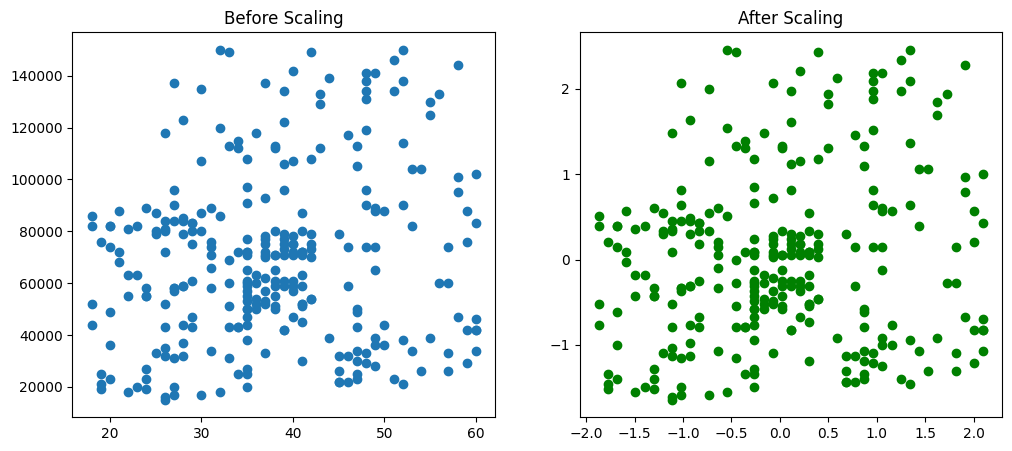

In [12]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='green')
ax2.set_title("After Scaling")

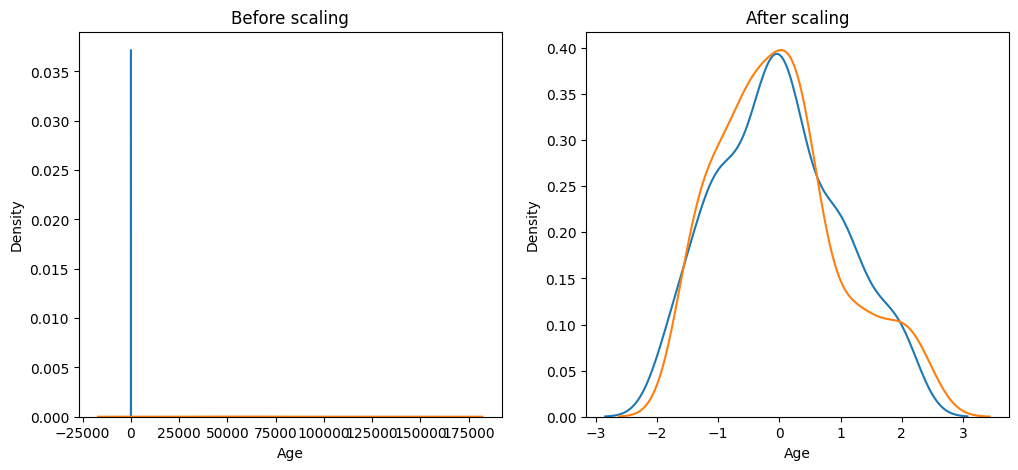

In [13]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before scaling")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax2.set_title("After scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [28]:
lr_orginal=LogisticRegression()
lr_scaled=LogisticRegression()

In [29]:
lr_orginal.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [30]:
y_pred=lr_orginal.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [31]:
print("Accuracy score for orginal data",accuracy_score(y_test,y_pred))
print("Accuracy score for orginal data",accuracy_score(y_test,y_pred_scaled))

Accuracy score for orginal data 0.8166666666666667
Accuracy score for orginal data 0.8166666666666667
